In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Input
import matplotlib.pyplot as plt

In [33]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("homer_bart",image_size=(64, 64),label_mode = "binary")

Found 269 files belonging to 2 classes.


In [34]:
train_data = dataset.take(8)
test_data = dataset.skip(8)
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
preprocess = tf.keras.Sequential([tf.keras.layers.Rescaling(1)]) # rescaling factor

model = tf.keras.Sequential()
model.add(Input((64,64,3)))
model.add(Flatten())
model.add(preprocess)
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [36]:
model.compile(optimizer="Adam",
              loss = "binary_crossentropy", # use tf.keras.losses._______(from_logits = False)  
              metrics = ['accuracy'])

In [37]:
history=model.fit(train_data,
          epochs = 50,
          batch_size = 64,
          verbose=1,
          validation_data = test_data)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5521 - loss: 536.2792 - val_accuracy: 0.7692 - val_loss: 372.2362
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5902 - loss: 464.1070 - val_accuracy: 0.7692 - val_loss: 83.7323
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5749 - loss: 162.2134 - val_accuracy: 0.9231 - val_loss: 3.5051
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 93.5415 - val_accuracy: 0.2308 - val_loss: 328.9307
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5101 - loss: 174.7618 - val_accuracy: 0.2308 - val_loss: 162.8427
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6883 - loss: 57.9223 - val_accuracy: 0.7692 - val_loss: 6.4052
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7749 - loss: 34.5455 - val_accuracy: 0.9231 - val_loss: 6.3503
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7952 - loss: 29.4663 - val_accuracy: 0.9231 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


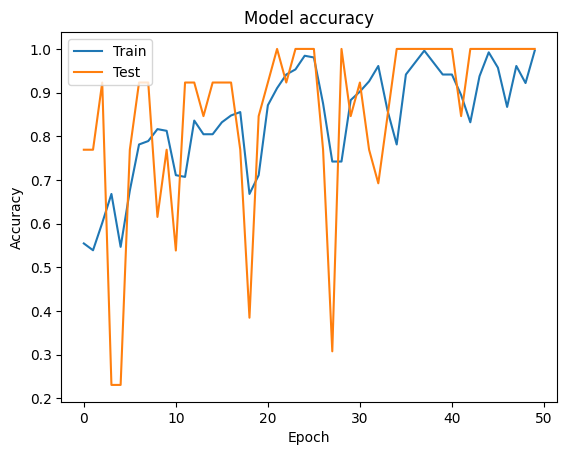

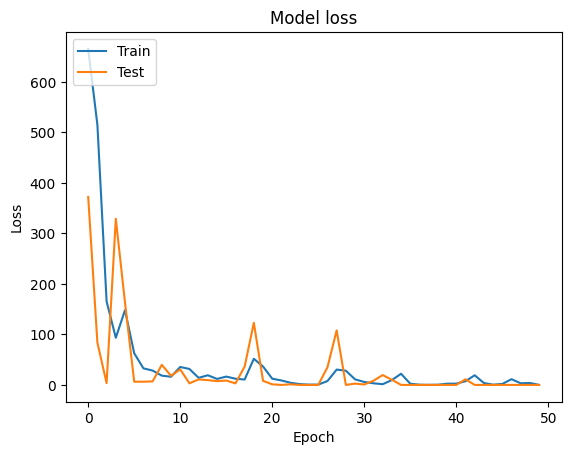

In [38]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
